In [190]:
import zipfile


In [216]:
zipfile.ZipFile('names.zip').extractall('.')

In [217]:
ls

Project 1.pdf    __MACOSX/        names/
Untitled.ipynb   allyears.csv.gz  names.zip


In [218]:
ls names

NationalReadMe.pdf  yob1914.txt         yob1949.txt         yob1984.txt
yob1880.txt         yob1915.txt         yob1950.txt         yob1985.txt
yob1881.txt         yob1916.txt         yob1951.txt         yob1986.txt
yob1882.txt         yob1917.txt         yob1952.txt         yob1987.txt
yob1883.txt         yob1918.txt         yob1953.txt         yob1988.txt
yob1884.txt         yob1919.txt         yob1954.txt         yob1989.txt
yob1885.txt         yob1920.txt         yob1955.txt         yob1990.txt
yob1886.txt         yob1921.txt         yob1956.txt         yob1991.txt
yob1887.txt         yob1922.txt         yob1957.txt         yob1992.txt
yob1888.txt         yob1923.txt         yob1958.txt         yob1993.txt
yob1889.txt         yob1924.txt         yob1959.txt         yob1994.txt
yob1890.txt         yob1925.txt         yob1960.txt         yob1995.txt
yob1891.txt         yob1926.txt         yob1961.txt         yob1996.txt
yob1892.txt         yob1927.txt         yob1962.txt         yob1

In [219]:
import numpy as np
import pandas as pd



df = pd.read_csv('names/yob2011.txt', names = ['name', 'sex', 'number' ])
df['year'] = pd.Series([2011 for x in range(len(df.index))])
#df.insert(3, '')
print(df)


           name sex  number  year
0        Sophia   F   21842  2011
1      Isabella   F   19910  2011
2          Emma   F   18803  2011
3        Olivia   F   17322  2011
4           Ava   F   15503  2011
...         ...  ..     ...   ...
33903     Zylar   M       5  2011
33904     Zylas   M       5  2011
33905     Zyran   M       5  2011
33906   Zyshawn   M       5  2011
33907  Zytavion   M       5  2011

[33908 rows x 4 columns]


In [224]:
allyears = pd.DataFrame({'name': pd.Series(dtype = 'str'), 'sex': pd.Series(dtype = 'str'), 'number': pd.Series(dtype = 'int64'), 'year': pd.Series(dtype = 'int64')})
for i in range(1880, 2019):
    df1 = pd.read_csv(f'names/yob{i}.txt', names = ['name', 'sex', 'number'])
    df1['year'] = pd.Series([i for x in range(len(df1.index))])
    allyears = pd.concat([allyears, df1], ignore_index = True)
allyears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [225]:
allyears.to_csv('allyears.csv.gz', index =False)

In [232]:
allyears = pd.read_csv('allyears.csv.gz')
allyears_indexed = allyears.set_index(["sex", "name", "year"])
allyears_indexed.sort_index()

number
sex name   year        
F   Aabha  2011       7
           2012       5
           2014       9
           2015       7
           2016       7
...                 ...
M   Zyvion 2009       5
    Zyvon  2015       7
    Zyyon  2014       6
    Zzyzx  2010       5
           2018       5

[1957046 rows x 1 columns]

<ipython-input-234-36262e6bb9f5>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = allyears_indexed.loc[('F', 'Mary')]


<AxesSubplot:xlabel='year'>

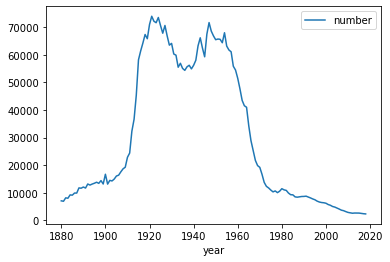

In [234]:
x = allyears_indexed.loc[('F', 'Mary')]
x.plot()

<ipython-input-235-c97fd695e052>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  (allyears_indexed.loc[('F', 'Mary')]/allyears_indexed.groupby('year').sum()).plot() #group by year to get year


<AxesSubplot:xlabel='year'>

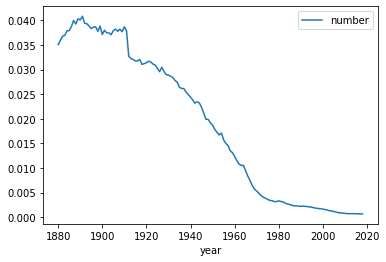

In [235]:
(allyears_indexed.loc[('F', 'Mary')]/allyears_indexed.groupby('year').sum()).plot() #group by year to get year
#then summing up all the births for that name for each year 

In [274]:
import matplotlib.pyplot as plt

def plotname(sex, name):
    nameyear= allyears.set_index(["sex", "name"])
    nameyear.sort_index()
    x = allyears_indexed.loc[(sex, name)]
    plt.plot(x, label = name)
    plt.legend()

In [284]:
def comparenames(sex, names):
    plt.axes([0, 0.6, 1.5, .5])
    plt.axis(xmin=1880, xmax=2018)
    for i in range(len(names)):
        plotname(sex, names[i])
    plt.show()
    

<ipython-input-274-121fb9875913>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = allyears_indexed.loc[(sex, name)]


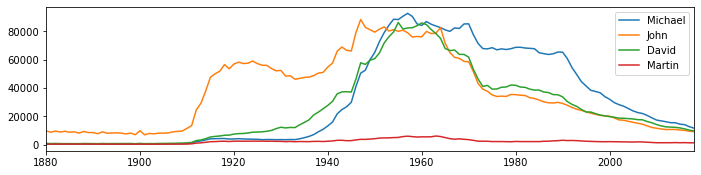

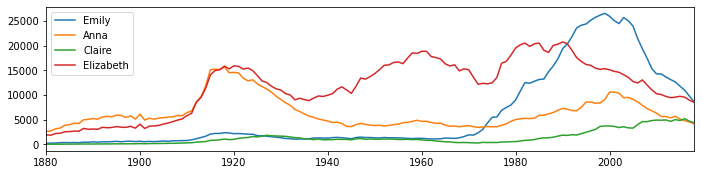

In [285]:
comparenames('M', ['Michael', 'John', 'David', 'Martin'])
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])